In [58]:
import pandas as pd
import numpy as np
import pytesseract
from torchmetrics.functional import char_error_rate, word_error_rate
from skimage.transform import rotate
from skimage.util import random_noise
import PIL
import cv2
from matplotlib import pyplot as plt

In [2]:
# sudo pacman -Syu libvoikko hspell nuspell hunspell aspell
from sibigrapi2023.pipelines.processing.utils import accuracyByLevenshteinDistance, cleanText

In [3]:
labels = context.catalog.load("labels")

[06/04/23 20:36:12] INFO     Loading data from 'labels' (PartitionedDataSet)...                 ]8;id=86998;file:///home/zig/.pyenv/versions/3.10.8/envs/sibgrapi23/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=400550;file:///home/zig/.pyenv/versions/3.10.8/envs/sibgrapi23/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [4]:
express_expense = context.catalog.load("express_expense")

                    INFO     Loading data from 'express_expense' (PartitionedDataSet)...        ]8;id=378;file:///home/zig/.pyenv/versions/3.10.8/envs/sibgrapi23/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=809109;file:///home/zig/.pyenv/versions/3.10.8/envs/sibgrapi23/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [5]:
l1 = labels['1000-receipt.txt']()

In [7]:
r1 = pytesseract.image_to_string(express_expense['1000-receipt.jpg']())

In [8]:
accuracyByLevenshteinDistance(r1, l1)

0.9433962264150944

In [9]:
import time
start = time.process_time()
# your code here    
print(time.process_time() - start)

7.976000000020633e-05


In [104]:
def generate_results(preprocess_image_func):
    results = list()
    for file_name, loader in express_expense.items():
        image = loader()
        image = preprocess_image_func(image)
        label = labels[file_name.replace('.jpg', '.txt')]()
        start = time.process_time()
        ocr_text = pytesseract.image_to_string(image)
        ocr_time = time.process_time() - start
        result = {'image_file': file_name,
                  'ld': accuracyByLevenshteinDistance(ocr_text, label),
                  'wer': float(word_error_rate(preds=cleanText(ocr_text), target=cleanText(label))),
                  'cer': float(char_error_rate(preds=cleanText(ocr_text), target=cleanText(label))),
                  'br': 1 if ocr_text else 0,
                  'ba': int(ocr_text == label),
                  'run_time': ocr_time}
        results.append(result)
    return pd.DataFrame(results)

def rotate5(image):
    return (rotate(np.array(image), 5, resize=True) * 255).astype(np.uint8)
def rotate10(image):
    return (rotate(np.array(image), 10, resize=True) * 255).astype(np.uint8)
def rotate15(image):
    return (rotate(np.array(image), 15, resize=True) * 255).astype(np.uint8)
def rotate20(image):
    return (rotate(np.array(image), 20, resize=True) * 255).astype(np.uint8)

def rotate_m5(image):
    return (rotate(np.array(image), -5, resize=True) * 255).astype(np.uint8)
def rotate_m10(image):
    return (rotate(np.array(image), -10, resize=True) * 255).astype(np.uint8)
def rotate_m15(image):
    return (rotate(np.array(image), -15, resize=True) * 255).astype(np.uint8)
def rotate_m20(image):
    return (rotate(np.array(image), -20, resize=True) * 255).astype(np.uint8)

def bright5(image):
    return cv2.convertScaleAbs(np.array(image), alpha=1, beta=5)
def bright10(image):
    return cv2.convertScaleAbs(np.array(image), alpha=1, beta=10)
def bright25(image):
    return cv2.convertScaleAbs(np.array(image), alpha=1, beta=25)
def bright50(image):
    return cv2.convertScaleAbs(np.array(image), alpha=1, beta=50)

def contrast10(image):
    return cv2.convertScaleAbs(np.array(image), alpha=1.10, beta=0)
def contrast25(image):
    return cv2.convertScaleAbs(np.array(image), alpha=1.25, beta=0)
def contrast50(image):
    return cv2.convertScaleAbs(np.array(image), alpha=1.50, beta=0)
def contrast100(image):
    return cv2.convertScaleAbs(np.array(image), alpha=2, beta=0)

def salt_pepper5(image):
    return (random_noise(np.array(image), mode='s&p', amount=0.05) * 255).astype(np.uint8)
def salt_pepper25(image):
    return (random_noise(np.array(image), mode='s&p', amount=0.25) * 255).astype(np.uint8)
def salt_pepper45(image):
    return (random_noise(np.array(image), mode='s&p', amount=0.45) * 255).astype(np.uint8)

def gaussian_blur3(image):
    return cv2.GaussianBlur(np.array(image), (3, 3), 0)
def gaussian_blur5(image):
    return cv2.GaussianBlur(np.array(image), (5, 5), 0)
def gaussian_blur7(image):
    return cv2.GaussianBlur(np.array(image), (7, 7), 0)

In [78]:
default_results = list()
for file_name, loader in express_expense.items():
    image = loader()
    label = labels[file_name.replace('.jpg', '.txt')]()
    start = time.process_time()
    ocr_text = pytesseract.image_to_string(image)
    ocr_time = time.process_time() - start
    result = {'image_file': file_name,
              'ld': accuracyByLevenshteinDistance(ocr_text, label),
              'wer': float(word_error_rate(preds=cleanText(ocr_text), target=cleanText(label))),
              'cer': float(char_error_rate(preds=cleanText(ocr_text), target=cleanText(label))),
              'br': 1 if ocr_text else 0,
              'ba': int(ocr_text == label),
              'run_time': ocr_time}
    default_results.append(result)

In [12]:
df = pd.DataFrame(default_results)

In [13]:
df.to_csv("default_results_aggregated.csv")

In [14]:
df

,image_file,ld,wer,cer,br,ba,run_time
0,1000-receipt.jpg,0.943396,1.0,0.056604,1,0,0.159629
1,1001-receipt.jpg,0.000000,1.0,1.000000,0,0,0.166976
2,1002-receipt.jpg,0.187166,1.0,0.812834,1,0,0.235983
3,1003-receipt.jpg,0.000000,1.0,1.000000,0,0,0.221117
4,1004-receipt.jpg,0.826087,1.0,0.173913,1,0,0.194368
...,...,...,...,...,...,...,...
186,1195-receipt.jpg,0.652422,1.0,0.347578,1,0,0.199762
187,1196-receipt.jpg,0.673835,1.0,0.326165,1,0,0.036309
188,1197-receipt.jpg,0.819444,1.0,0.180556,1,0,0.044312
189,1198-receipt.jpg,0.792683,1.0,0.207317,1,0,0.031897


## Rotation

In [15]:
df.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.590971,1.0,0.409029,0.973822,0.0,0.167097
std,0.289236,0.0,0.289236,0.160084,0.0,0.251212
min,0.000000,1.0,0.015209,0.000000,0.0,0.017254
25%,0.383500,1.0,0.177510,1.000000,0.0,0.055551
50%,0.671733,1.0,0.328267,1.000000,0.0,0.175867
75%,0.822490,1.0,0.616500,1.000000,0.0,0.207795
max,0.984791,1.0,1.000000,1.000000,0.0,3.439533


In [16]:
r5 = generate_results(rotate5)

In [17]:
r5.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.331409,1.0,0.668591,0.853403,0.0,0.243667
std,0.274867,0.0,0.274867,0.354633,0.0,0.266013
min,0.000000,1.0,0.038023,0.000000,0.0,0.064683
25%,0.071186,1.0,0.452484,1.000000,0.0,0.174562
50%,0.309028,1.0,0.690972,1.000000,0.0,0.228717
75%,0.547516,1.0,0.928814,1.000000,0.0,0.255818
max,0.961977,1.0,1.000000,1.000000,0.0,3.817850


In [18]:
r10 = generate_results(rotate10)

In [19]:
r10.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.061472,1.0,0.938528,0.481675,0.0,0.245610
std,0.104725,0.0,0.104725,0.500977,0.0,0.268546
min,0.000000,1.0,0.305221,0.000000,0.0,0.060528
25%,0.000000,1.0,0.914526,0.000000,0.0,0.176030
50%,0.000000,1.0,1.000000,0.000000,0.0,0.232560
75%,0.085474,1.0,1.000000,1.000000,0.0,0.260177
max,0.694779,1.0,1.000000,1.000000,0.0,3.849615


In [20]:
r15 = generate_results(rotate15)

In [21]:
r15.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.014221,1.0,0.985779,0.214660,0.0,0.249942
std,0.052904,0.0,0.052904,0.411665,0.0,0.273659
min,0.000000,1.0,0.500000,0.000000,0.0,0.065775
25%,0.000000,1.0,1.000000,0.000000,0.0,0.172151
50%,0.000000,1.0,1.000000,0.000000,0.0,0.239088
75%,0.000000,1.0,1.000000,0.000000,0.0,0.265641
max,0.500000,1.0,1.000000,1.000000,0.0,3.913732


In [22]:
r20 = generate_results(rotate20)

In [23]:
r20.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.006408,1.0,0.993592,0.141361,0.0,0.250719
std,0.042571,0.0,0.042571,0.349309,0.0,0.269037
min,0.000000,1.0,0.426829,0.000000,0.0,0.069162
25%,0.000000,1.0,1.000000,0.000000,0.0,0.172677
50%,0.000000,1.0,1.000000,0.000000,0.0,0.240934
75%,0.000000,1.0,1.000000,0.000000,0.0,0.266953
max,0.573171,1.0,1.000000,1.000000,0.0,3.849193


In [24]:
rm5 = generate_results(rotate_m5)

In [25]:
rm5.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.340170,1.0,0.659830,0.837696,0.0,0.247546
std,0.288503,0.0,0.288503,0.369698,0.0,0.265357
min,0.000000,1.0,0.036697,0.000000,0.0,0.083719
25%,0.070160,1.0,0.421012,1.000000,0.0,0.179301
50%,0.295673,1.0,0.704327,1.000000,0.0,0.229176
75%,0.578988,1.0,0.929840,1.000000,0.0,0.260111
max,0.963303,1.0,1.000000,1.000000,0.0,3.811388


In [26]:
rm10 = generate_results(rotate_m10)

In [27]:
rm10.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.068622,1.0,0.931378,0.471204,0.0,0.246990
std,0.123269,0.0,0.123269,0.500482,0.0,0.268278
min,0.000000,1.0,0.413502,0.000000,0.0,0.068984
25%,0.000000,1.0,0.915455,0.000000,0.0,0.177635
50%,0.000000,1.0,1.000000,0.000000,0.0,0.232305
75%,0.084545,1.0,1.000000,1.000000,0.0,0.256498
max,0.586498,1.0,1.000000,1.000000,0.0,3.847856


In [28]:
rm15 = generate_results(rotate_m15)

In [29]:
rm15.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.014698,1.0,0.985302,0.178010,0.0,0.250465
std,0.044465,0.0,0.044465,0.383527,0.0,0.271348
min,0.000000,1.0,0.634783,0.000000,0.0,0.064825
25%,0.000000,1.0,1.000000,0.000000,0.0,0.174107
50%,0.000000,1.0,1.000000,0.000000,0.0,0.241345
75%,0.000000,1.0,1.000000,0.000000,0.0,0.264489
max,0.365217,1.0,1.000000,1.000000,0.0,3.881851


In [30]:
rm20 = generate_results(rotate_m20)

In [32]:
rm20.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.002994,1.0,0.997006,0.068063,0.0,0.260320
std,0.020091,0.0,0.020091,0.252516,0.0,0.277247
min,0.000000,1.0,0.742029,0.000000,0.0,0.067542
25%,0.000000,1.0,1.000000,0.000000,0.0,0.171581
50%,0.000000,1.0,1.000000,0.000000,0.0,0.244410
75%,0.000000,1.0,1.000000,0.000000,0.0,0.271819
max,0.257971,1.0,1.000000,1.000000,0.0,3.918686


## Brightness

In [50]:
b5 = generate_results(bright5)

In [51]:
b5.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.590359,1.0,0.409641,0.973822,0.0,0.169370
std,0.289328,0.0,0.289328,0.160084,0.0,0.252628
min,0.000000,1.0,0.007605,0.000000,0.0,0.018182
25%,0.382431,1.0,0.177510,1.000000,0.0,0.056937
50%,0.671733,1.0,0.328267,1.000000,0.0,0.176266
75%,0.822490,1.0,0.617569,1.000000,0.0,0.213082
max,0.992395,1.0,1.000000,1.000000,0.0,3.455782


In [54]:
b10 = generate_results(bright10)

In [55]:
b10.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.589928,1.0,0.410072,0.973822,0.0,0.168435
std,0.289319,0.0,0.289319,0.160084,0.0,0.252171
min,0.000000,1.0,0.007605,0.000000,0.0,0.017498
25%,0.381896,1.0,0.177510,1.000000,0.0,0.060007
50%,0.670360,1.0,0.329640,1.000000,0.0,0.177994
75%,0.822490,1.0,0.618104,1.000000,0.0,0.210195
max,0.992395,1.0,1.000000,1.000000,0.0,3.453599


In [56]:
b25 = generate_results(bright25)

In [57]:
b25.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.588328,1.0,0.411672,0.968586,0.0,0.168847
std,0.291873,0.0,0.291873,0.174891,0.0,0.256603
min,0.000000,1.0,0.015209,0.000000,0.0,0.017534
25%,0.385841,1.0,0.175315,1.000000,0.0,0.057998
50%,0.670360,1.0,0.329640,1.000000,0.0,0.177424
75%,0.824685,1.0,0.614159,1.000000,0.0,0.212240
max,0.984791,1.0,1.000000,1.000000,0.0,3.511544


In [52]:
b50 = generate_results(bright50)

In [53]:
b50.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.000000,191.000000,191.000000,191.0,191.000000
mean,0.580029,0.994764,0.419971,0.968586,0.0,0.159094
std,0.293099,0.072357,0.293099,0.174891,0.0,0.248288
min,0.000000,0.000000,0.000000,0.000000,0.0,0.016832
25%,0.342032,1.000000,0.187519,1.000000,0.0,0.059807
50%,0.673219,1.000000,0.326781,1.000000,0.0,0.158476
75%,0.812481,1.000000,0.657968,1.000000,0.0,0.198963
max,1.000000,1.000000,1.000000,1.000000,0.0,3.396455


## Contrast

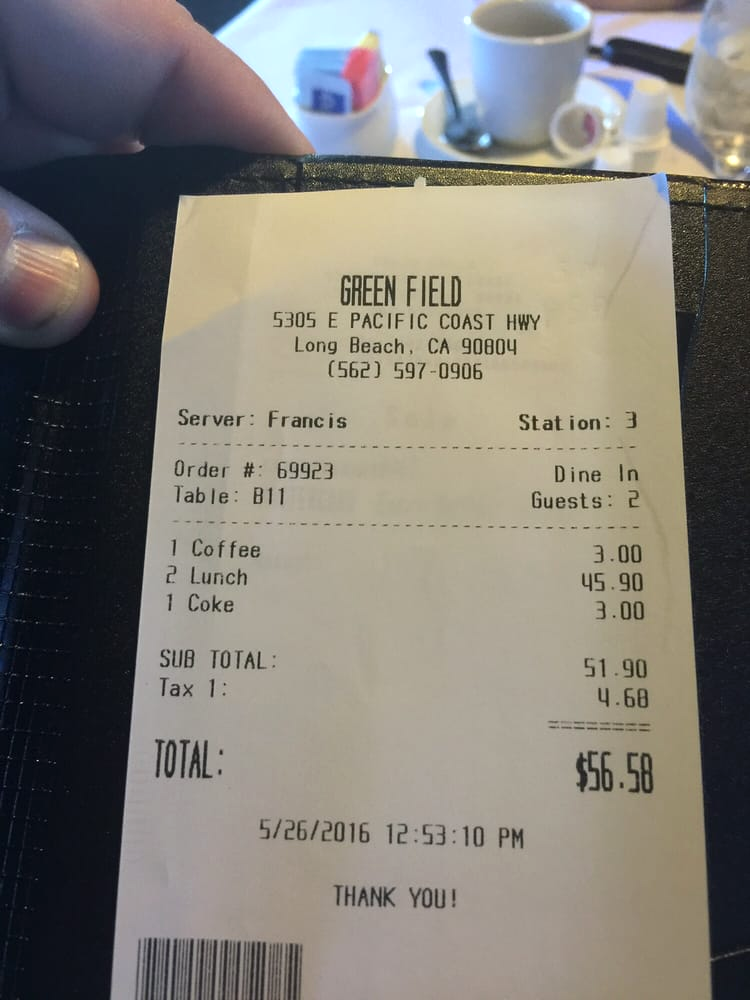

In [95]:
PIL.Image.fromarray(contrast5(express_expense['1000-receipt.jpg']()))

In [97]:
c10 = generate_results(contrast10)

In [98]:
c10.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.587722,1.0,0.412278,0.973822,0.0,0.190455
std,0.294281,0.0,0.294281,0.160084,0.0,0.317348
min,0.000000,1.0,0.015209,0.000000,0.0,0.017740
25%,0.365183,1.0,0.176403,1.000000,0.0,0.064170
50%,0.682540,1.0,0.317460,1.000000,0.0,0.195374
75%,0.823597,1.0,0.634817,1.000000,0.0,0.232859
max,0.984791,1.0,1.000000,1.000000,0.0,4.363994


In [99]:
c25 = generate_results(contrast25)

In [100]:
c25.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.000000,191.000000,191.000000,191.0,191.000000
mean,0.575213,0.994764,0.424788,0.968586,0.0,0.181708
std,0.295684,0.072357,0.295684,0.174891,0.0,0.297671
min,0.000000,0.000000,0.000000,0.000000,0.0,0.015734
25%,0.322485,1.000000,0.182832,1.000000,0.0,0.061261
50%,0.673219,1.000000,0.326781,1.000000,0.0,0.174861
75%,0.817168,1.000000,0.677515,1.000000,0.0,0.227445
max,1.000000,1.000000,1.000000,1.000000,0.0,4.068868


In [101]:
c50 = generate_results(contrast50)

In [102]:
c50.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.541579,1.0,0.458421,0.931937,0.0,0.130508
std,0.296398,0.0,0.296398,0.252516,0.0,0.180995
min,0.000000,1.0,0.011331,0.000000,0.0,0.009436
25%,0.308297,1.0,0.207855,1.000000,0.0,0.049303
50%,0.603239,1.0,0.396761,1.000000,0.0,0.109108
75%,0.792145,1.0,0.691703,1.000000,0.0,0.177950
max,0.988669,1.0,1.000000,1.000000,0.0,2.376430


In [106]:
c100 = generate_results(contrast100)

In [107]:
c100.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.443570,1.0,0.556430,0.874346,0.0,0.090072
std,0.314465,0.0,0.314465,0.332331,0.0,0.141960
min,0.000000,1.0,0.011407,0.000000,0.0,0.007781
25%,0.121953,1.0,0.284474,1.000000,0.0,0.037451
50%,0.475694,1.0,0.524306,1.000000,0.0,0.076163
75%,0.715526,1.0,0.878047,1.000000,0.0,0.115833
max,0.988593,1.0,1.000000,1.000000,0.0,1.895878


## Noise

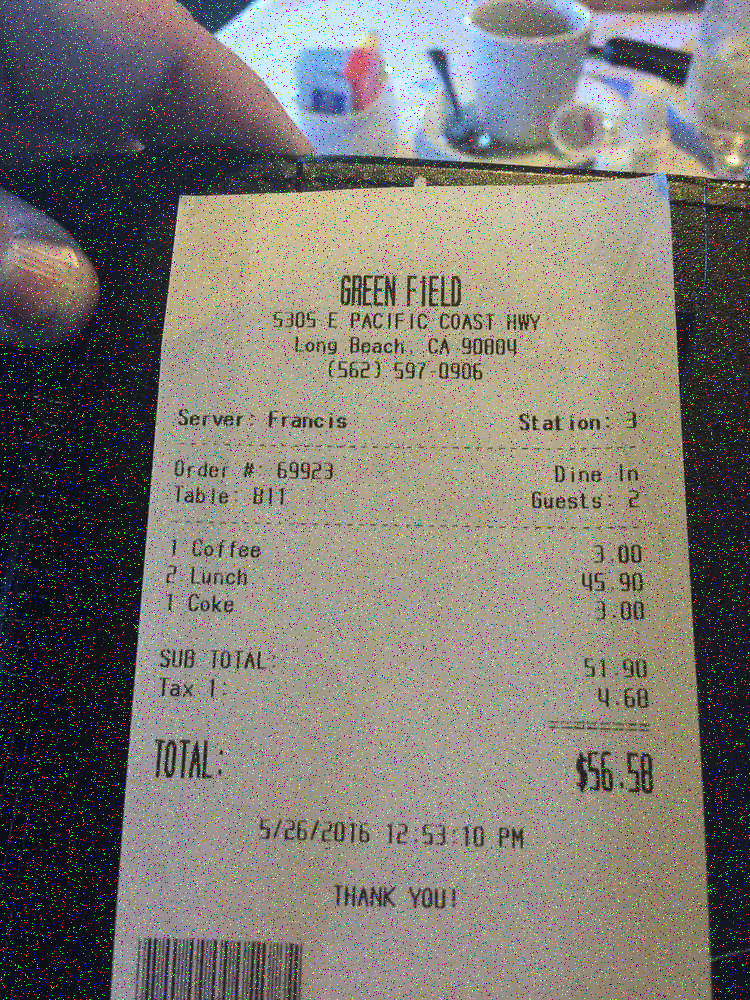

In [65]:
PIL.Image.fromarray(salt_pepper5(express_expense['1000-receipt.jpg']()))

In [62]:
sp5 = generate_results(salt_pepper5)

In [63]:
sp5.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.172029,1.0,0.827971,0.617801,0.0,0.229593
std,0.204042,0.0,0.204042,0.487202,0.0,0.363672
min,0.000000,1.0,0.067511,0.000000,0.0,0.023256
25%,0.000000,1.0,0.694320,0.000000,0.0,0.077864
50%,0.089552,1.0,0.910448,1.000000,0.0,0.246064
75%,0.305680,1.0,1.000000,1.000000,0.0,0.276315
max,0.932489,1.0,1.000000,1.000000,0.0,5.019629


In [67]:
sp25 = generate_results(salt_pepper25)

In [68]:
sp25.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.000721,1.0,0.999279,0.036649,0.0,0.241947
std,0.004468,0.0,0.004468,0.188393,0.0,0.320677
min,0.000000,1.0,0.957806,0.000000,0.0,0.020910
25%,0.000000,1.0,1.000000,0.000000,0.0,0.080292
50%,0.000000,1.0,1.000000,0.000000,0.0,0.259691
75%,0.000000,1.0,1.000000,0.000000,0.0,0.294204
max,0.042194,1.0,1.000000,1.000000,0.0,4.362850


In [69]:
sp45 = generate_results(salt_pepper45)

In [70]:
sp45.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.000392,1.0,0.999608,0.073298,0.0,0.235286
std,0.001846,0.0,0.001846,0.261311,0.0,0.295174
min,0.000000,1.0,0.982639,0.000000,0.0,0.023277
25%,0.000000,1.0,1.000000,0.000000,0.0,0.089973
50%,0.000000,1.0,1.000000,0.000000,0.0,0.252341
75%,0.000000,1.0,1.000000,0.000000,0.0,0.277850
max,0.017361,1.0,1.000000,1.000000,0.0,3.987114


## Blur

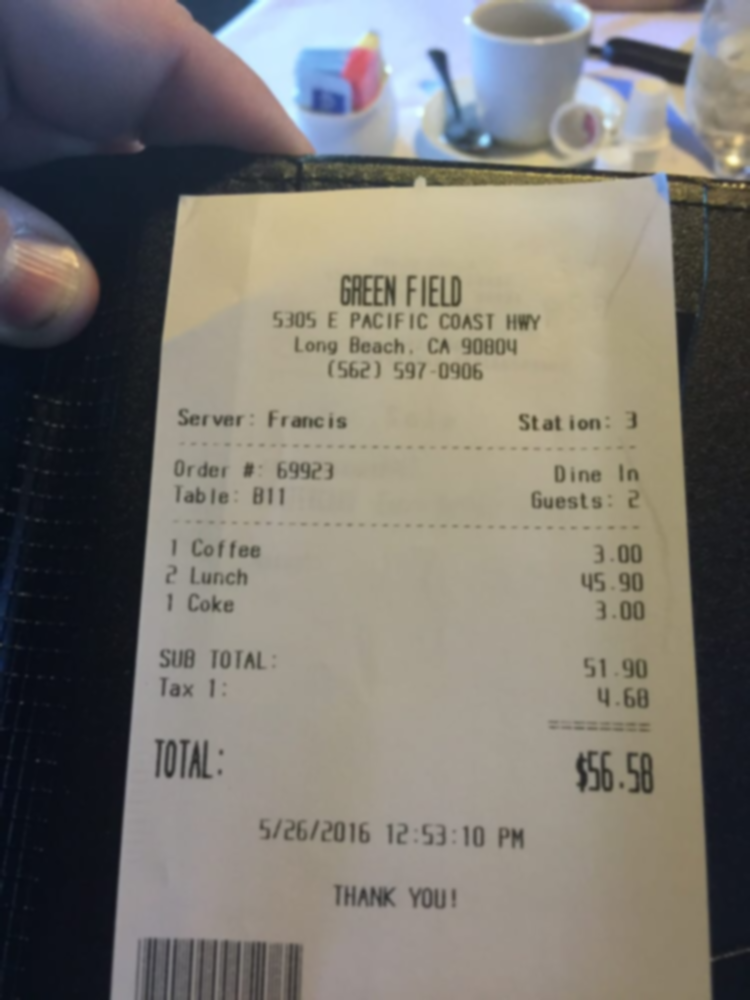

In [74]:
PIL.Image.fromarray(gaussian_blur5(express_expense['1000-receipt.jpg']()))

In [88]:
gb3 = generate_results(gaussian_blur3)

In [89]:
gb3.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.000000,191.000000,191.000000,191.0,191.000000
mean,0.475903,0.994764,0.524097,0.884817,0.0,0.204656
std,0.329867,0.072357,0.329867,0.320082,0.0,0.264656
min,0.000000,0.000000,0.000000,0.000000,0.0,0.022622
25%,0.152770,1.000000,0.233526,1.000000,0.0,0.077441
50%,0.506098,1.000000,0.493902,1.000000,0.0,0.209086
75%,0.766474,1.000000,0.847230,1.000000,0.0,0.260578
max,1.000000,1.000000,1.000000,1.000000,0.0,3.589815


In [79]:
gb5 = generate_results(gaussian_blur5)

In [80]:
gb5.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.375487,1.0,0.624513,0.801047,0.0,0.200113
std,0.332187,0.0,0.332187,0.400262,0.0,0.251887
min,0.000000,1.0,0.021605,0.000000,0.0,0.025051
25%,0.045027,1.0,0.329605,1.000000,0.0,0.077866
50%,0.319035,1.0,0.680965,1.000000,0.0,0.209434
75%,0.670395,1.0,0.954973,1.000000,0.0,0.250694
max,0.978395,1.0,1.000000,1.000000,0.0,3.405131


In [90]:
gb7 = generate_results(gaussian_blur7)

In [91]:
gb7.describe()

,ld,wer,cer,br,ba,run_time
count,191.000000,191.0,191.000000,191.000000,191.0,191.000000
mean,0.260976,1.0,0.739024,0.691099,0.0,0.193139
std,0.300307,0.0,0.300307,0.463254,0.0,0.233068
min,0.000000,1.0,0.009259,0.000000,0.0,0.026816
25%,0.000000,1.0,0.500628,0.000000,0.0,0.080855
50%,0.108481,1.0,0.891519,1.000000,0.0,0.202018
75%,0.499372,1.0,1.000000,1.000000,0.0,0.240112
max,0.990741,1.0,1.000000,1.000000,0.0,3.147944
